<a href="https://colab.research.google.com/github/NavjyotDataScientist/From-Data-To-Decision/blob/main/cutomer_spending_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Note: Please note  one thing which is for you only, dont try to take out mistake in every notebook on anywhere. Take out good things and make your project 100 percent thats learning. rest leave it thanks all.

* Hello all a very good morning with lots of potential and learn things right here.

 * Full ML Pipeline (Step-by-Step)
1. Problem Definition
Goal: Segment customers into groups (e.g., high spenders vs low spenders) or predict spending score.

 *Why: Helps businesses target marketing campaigns.

2. Data Collection
Dataset: Mall Customers Dataset (2025).

Columns: CustomerID, Gender, Age, Annual Income, Spending Score.

3. Data Exploration (EDA)
Check distributions of age, income, spending score.

Visualize clusters (scatter plots of income vs spending).

Identify missing values or anomalies.

4. Preprocessing
Categorical encoding: Convert Gender into numbers (OneHotEncoder).

Scaling: Standardize Age, Income, Spending Score for clustering.

Train-test split: If doing supervised learning.

5. Baseline Model
For clustering: KMeans with 3–5 clusters.

For classification: Logistic Regression predicting “High spender” vs “Low spender”.

6. Error Analysis
Clustering: Check if clusters overlap or don’t make business sense.

Classification: Look at confusion matrix—are young customers misclassified?

7. Improvements
Add engineered features (e.g., Income/Age ratio).

Try stronger models (Random Forest, Gradient Boosting).

Tune hyperparameters (number of clusters, tree depth).

8. Deployment
Build a dashboard showing customer segments.

Use API to predict new customer’s segment.

Monitor drift (new spending patterns).

In [10]:
# Data Understanding with Pandas
# Step 1: Import pandas
import pandas as pd

# Step 2: Load dataset (after uploading Mall_Customers.csv in Colab)
df = pd.read_csv("/content/drive/MyDrive/from-data-to-decision/4.0_mall_customer/Mall_Customers.csv")

# Step 3: Look at first few rows
print(df.head())
print('*' * 80)

# Step 4: Check dataset shape (rows, columns)
print("Shape:", df.shape)
print('*' * 80)

# Step 5: Get column names and data types
print(df.info())
print('*' * 80)

# Step 6: Basic statistics for numeric columns
print(df.describe())
print('*' * 80)

# Step 7: Check for missing values
print(df.isnull().sum())
print('*' * 80)

# Step 8: Quick look at unique values in categorical columns
print("Unique Genders:", df['Gender'].unique())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
********************************************************************************
Shape: (250, 5)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250

Choosing a Target Column
It depends on the ML task you want to practice:

Clustering (unsupervised) → No target column. You use Age, Income, and Spending Score to group customers into segments.

Classification (supervised) → You can create a target column, e.g.:

Label customers as High Spenders vs Low Spenders based on Spending Score.

Example: Spending Score >= 50 → High, else Low.

Regression (supervised) → Use Spending Score as the target and predict it from Age, Gender, and Income.

In [11]:
# Excellent mindset ⚡ — before we jump into clustering, let’s pause and ask: is there anything left in the data understanding phase?

# Data understanding is about making sure we know the dataset inside out before modeling. With pandas, we’ve already:

# Looked at the first rows (head())

# Checked shape (shape)

# Inspected column types (info())

# Summarized numeric stats (describe())

# Checked missing values (isnull().sum())

# Looked at categorical unique values (unique())

In [16]:
print(df['Gender'].value_counts())
print('*' * 80)

print(df['Age'].value_counts().head())
print(df['Annual Income (k$)'].value_counts().head())
print('*' * 80)

# Corrected line to calculate correlation only for numerical columns
print(df.select_dtypes(include=['number']).corr())
print('*' * 80)

print(df['Annual Income (k$)'].describe())
print('*' * 80)

Gender
Female    137
Male      113
Name: count, dtype: int64
********************************************************************************
Age
30    13
32    13
31    10
35    10
19    10
Name: count, dtype: int64
Annual Income (k$)
54    12
78    12
48     6
62     6
60     6
Name: count, dtype: int64
********************************************************************************
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.058195            0.867164   
Age                      -0.058195  1.000000           -0.060257   
Annual Income (k$)        0.867164 -0.060257            1.000000   
Spending Score (1-100)    0.012075 -0.359084            0.011343   

                        Spending Score (1-100)  
CustomerID                            0.012075  
Age                                  -0.359084  
Annual Income (k$)                    0.011343  
Spending Score (1-100)                1.000000  
**************************

In [18]:
# Cleaning Checks with Pandas
# 1. Check for missing values
print("Missing values:\n", df.isnull().sum())
print('*' * 80)

# 2. Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())
print('*' * 80)

# 3. Check for inconsistent categories
print("\nUnique Genders:", df['Gender'].unique())
print('*' * 80)

# 4. Check numeric ranges
print("\nAge range:", df['Age'].min(), "-", df['Age'].max())
print("Income range:", df['Annual Income (k$)'].min(), "-", df['Annual Income (k$)'].max())
print("Spending Score range:", df['Spending Score (1-100)'].min(), "-", df['Spending Score (1-100)'].max())


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
********************************************************************************

Duplicate rows: 0
********************************************************************************

Unique Genders: ['Male' 'Female']
********************************************************************************

Age range: 18 - 70
Income range: 15 - 325
Spending Score range: 1 - 99


In [19]:
# 1. Distribution of Age
print("Age stats:\n", df['Age'].describe())
print("\nAge frequency:\n", df['Age'].value_counts().head())

# 2. Average spending by Gender
print("\nAverage Spending Score by Gender:\n", df.groupby('Gender')['Spending Score (1-100)'].mean())

# 3. Average income by Gender
print("\nAverage Income by Gender:\n", df.groupby('Gender')['Annual Income (k$)'].mean())

# 4. Relationship check: Income vs Spending (correlation)
print("\nCorrelation between Income and Spending Score:\n", df[['Annual Income (k$)','Spending Score (1-100)']].corr())

# 5. Age groups vs Spending
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,25,35,50,70], labels=['18-25','26-35','36-50','51-70'])
print("\nAverage Spending Score by Age Group:\n", df.groupby('AgeGroup')['Spending Score (1-100)'].mean())


Age stats:
 count    250.00000
mean      38.49200
std       13.17026
min       18.00000
25%       29.00000
50%       36.00000
75%       47.75000
max       70.00000
Name: Age, dtype: float64

Age frequency:
 Age
30    13
32    13
31    10
35    10
19    10
Name: count, dtype: int64

Average Spending Score by Gender:
 Gender
Female    50.423358
Male      50.026549
Name: Spending Score (1-100), dtype: float64

Average Income by Gender:
 Gender
Female     91.883212
Male      100.088496
Name: Annual Income (k$), dtype: float64

Correlation between Income and Spending Score:
                         Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)                1.000000                0.011343
Spending Score (1-100)            0.011343                1.000000

Average Spending Score by Age Group:
 AgeGroup
18-25    52.638889
26-35    67.469136
36-50    40.321429
51-70    34.977778
Name: Spending Score (1-100), dtype: float64


/tmp/ipython-input-4293886211.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nAverage Spending Score by Age Group:\n", df.groupby('AgeGroup')['Spending Score (1-100)'].mean())


Useful Plots for Clustering (Mall Customers Dataset)
Here are the most insightful ones:

Histogram of Age → Shows customer age distribution.

Histogram of Annual Income → Reveals income spread.

Histogram of Spending Score → Shows how spending is distributed.

Boxplot of Income by Gender → Compare male vs female income.

Scatter plot: Income vs Spending Score → Key for clustering, shows natural groupings.

Scatter plot: Age vs Spending Score → Another angle for clusters.

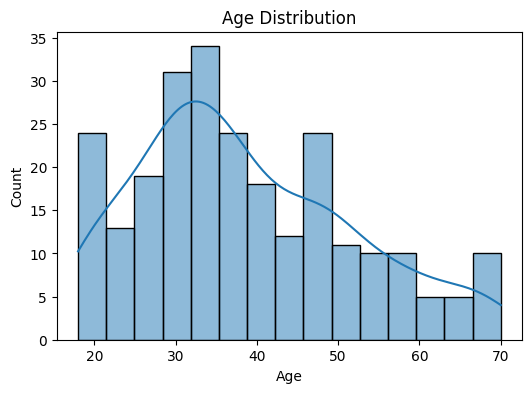

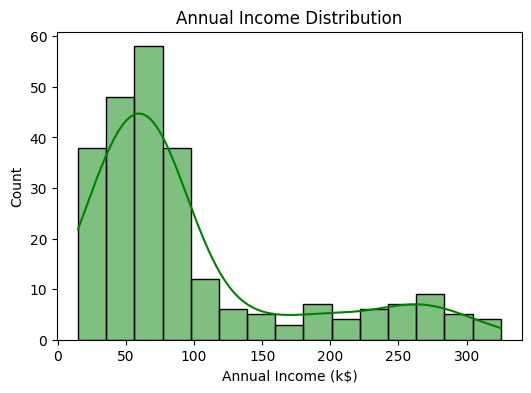

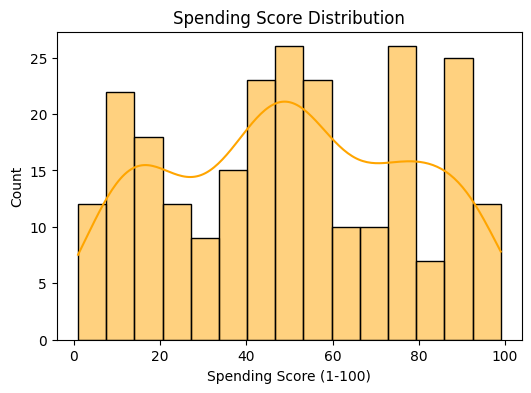

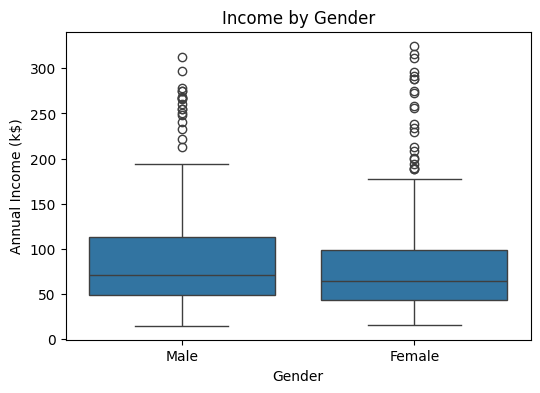

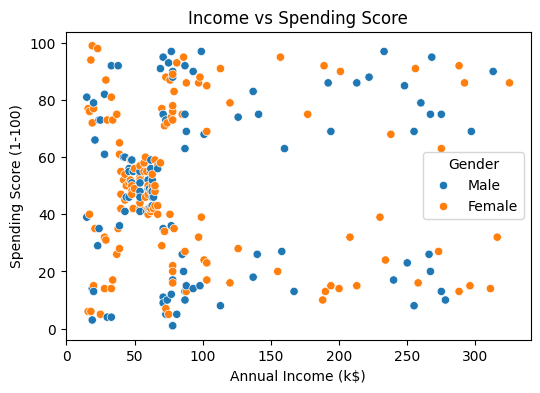

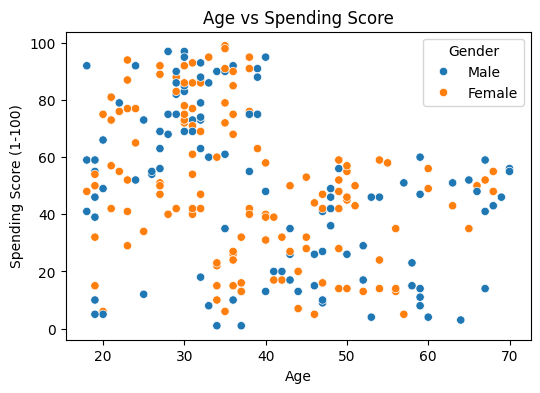

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

# 2. Income distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='green')
plt.title("Annual Income Distribution")
plt.show()

# 3. Spending Score distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='orange')
plt.title("Spending Score Distribution")
plt.show()

# 4. Boxplot of Income by Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title("Income by Gender")
plt.show()

# 5. Scatter plot: Income vs Spending Score
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title("Income vs Spending Score")
plt.show()

# 6. Scatter plot: Age vs Spending Score
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title("Age vs Spending Score")
plt.show()


In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,1,Male,19,15,39,18-25
1,2,Male,21,15,81,18-25
2,3,Female,20,16,6,18-25
3,4,Female,23,16,77,18-25
4,5,Female,31,17,40,26-35


In [22]:
# Goals of Preprocessing
# Drop irrelevant columns → CustomerID is just an identifier, not useful.

# Encode categorical features → Gender must be converted into numbers.

# Scale numeric features → Age, Annual Income, Spending Score need scaling so one feature doesn’t dominate.

In [23]:
# Preprocessing with Scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/from-data-to-decision/4.0_mall_customer/Mall_Customers.csv")

# Step 1: Drop irrelevant column
X = df.drop('CustomerID', axis=1)

# Step 2: Define feature types
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features = ['Gender']

# Step 3: Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Step 4: Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [25]:
# n clustering, there is no target column. We’re not predicting labels; we’re discovering natural groups in the data.

# Since there’s nothing to “train” against, splitting into train/test doesn’t make sense here. Instead, we evaluate clusters using metrics like:

# Inertia (within-cluster distance)

# Silhouette score (how well-separated clusters are)

# Visual inspection (scatter plots, cluster profiles)

In [26]:
# Two Standard Methods
# 1. Elbow Method
# Idea: Run KMeans for different values of k (number of clusters).

# Plot the inertia (sum of squared distances to cluster centers).

# Look for the “elbow” point where adding more clusters doesn’t improve much.

# 2. Silhouette Score
# Idea: Measures how well each point fits into its cluster compared to other clusters.

# Score ranges from -1 to 1. Higher = better defined clusters.

# Run for different k values and pick the one with the highest score.

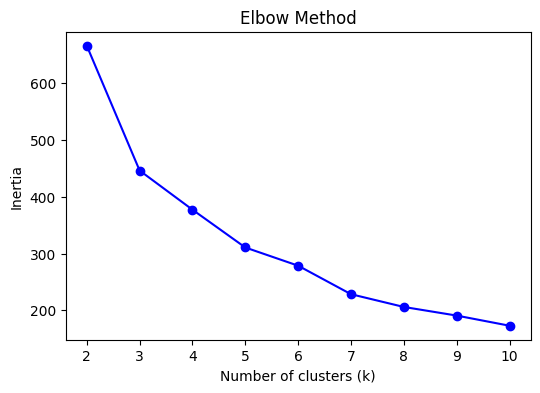

For k=2, silhouette score=0.321
For k=3, silhouette score=0.332
For k=4, silhouette score=0.290
For k=5, silhouette score=0.309
For k=6, silhouette score=0.270
For k=7, silhouette score=0.347
For k=8, silhouette score=0.338
For k=9, silhouette score=0.326
For k=10, silhouette score=0.348


In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply preprocessing first
X_processed = preprocessor.fit_transform(X)

# 1. Elbow Method
inertia = []
K = range(2, 11)  # test clusters from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 2. Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    print(f"For k={k}, silhouette score={score:.3f}")


In [28]:
# # Next Steps After Cluster Number Selection
# Run KMeans with chosen k (e.g., k=4 or k=5)

# Fit the model on your preprocessed data.

# Assign cluster labels to each customer.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_processed)
df['Cluster'] = labels


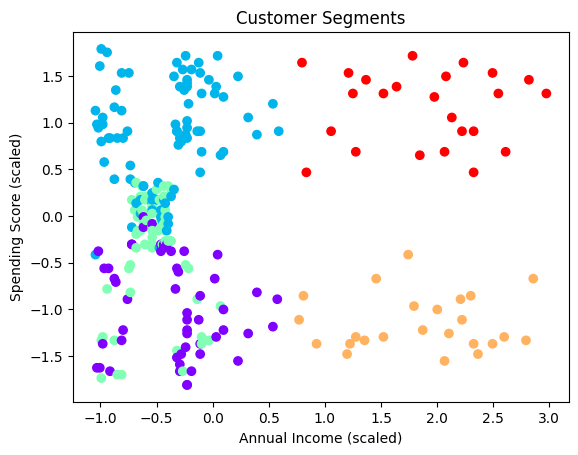

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X_processed[:,1], X_processed[:,2], c=labels, cmap='rainbow')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments")
plt.show()


In [31]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")


['kmeans_model.pkl']